# Import of packages

In [1]:
'''To install the required packages that are not included in Colaboratory.'''
#Installation of packages that are not included in Colaboratory
!pip install kneed
!pip install osmnx

'''To install a specific version of the matplotlib package.'''
!pip install matplotlib==3.1.3

'''To import the required packages.'''
import pandas as pd
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
import math
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from kneed import KneeLocator
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

#import osmnx as ox

  Using cached matplotlib-3.3.4-cp38-cp38-macosx_10_9_x86_64.whl (8.5 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Using cached matplotlib-3.1.3-cp38-cp38-macosx_10_9_x86_64.whl (13.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

osmnx 1.0.1 requires matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.


# Settings

In [2]:
'''To display all output results of a Jupyter cell.'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
'''To ensure that the output results of extensive output results are not truncated.'''
#pd.options.display.max_rows = 4000

'To ensure that the output results of extensive output results are not truncated.'

# To import csv files

In [4]:
''' To import the df_for_edges dfs of Belgium and the Netherlands'''
datalink = "https://raw.githubusercontent.com/polkuleuven/Thesis_Train/main/df_for_edges/"
df_for_edges = pd.read_csv( datalink + 'df_for_edges_Belgium.csv', sep=",")
df_for_edges_Netherlands = pd.read_csv(datalink + 'df_for_edges_Netherlands.csv', sep=",")
df_for_edges_Switzerland = pd.read_csv(datalink + 'df_for_edges_Switzerland.csv', sep=",")
df_for_edges
df_for_edges_Netherlands
df_for_edges_Switzerland

' To import the df_for_edges dfs of Belgium and the Netherlands'

route_id             stop_name_1        stop_name_2
0           115                MOUSCRON           HERSEAUX
1           115                HERSEAUX          FROYENNES
2           115               FROYENNES            TOURNAI
3           116                  KNOKKE         DUINBERGEN
4           116              DUINBERGEN              HEIST
...         ...                     ...                ...
11210       785  NOORDERKEMPEN (BRECHT)         BREDA (NL)
11211       785              BREDA (NL)  ROTTERDAM CS (NL)
11212       785       ROTTERDAM CS (NL)   DEN HAAG HS (NL)
11213       785        DEN HAAG HS (NL)      SCHIPHOL (NL)
11214       785           SCHIPHOL (NL)  AMSTERDAM CS (NL)

[11215 rows x 3 columns]

route_id                  stop_name_1          stop_name_2
0        17522           AMSTERDAM CENTRAAL     SCHIPHOL AIRPORT
1        17522             SCHIPHOL AIRPORT   ROTTERDAM CENTRAAL
2        17562           ROTTERDAM CENTRAAL  ROTTERDAM ALEXANDER
3        17562          ROTTERDAM ALEXANDER                GOUDA
4        17562                        GOUDA     UTRECHT CENTRAAL
...        ...                          ...                  ...
1585     77642  BRUSSELS AIRPORT - ZAVENTEM             MECHELEN
1586     77642                     MECHELEN    ANTWERPEN-BERCHEM
1587     77642            ANTWERPEN-BERCHEM   ANTWERPEN-CENTRAAL
1588     77642           ANTWERPEN-CENTRAAL        NOORDERKEMPEN
1589     77642                NOORDERKEMPEN                BREDA

[1590 rows x 3 columns]

route_id         stop_name_1         stop_name_2
0           00001.000044.018:1         LES BRENETS          LES FRETES
1           00001.000044.018:1          LES FRETES  LE LOCLE LE CHALET
2           00001.000044.018:1  LE LOCLE LE CHALET            LE LOCLE
3           00001.000044.028:1         LES BRENETS          LES FRETES
4           00001.000044.028:1          LES FRETES  LE LOCLE LE CHALET
...                        ...                 ...                 ...
349821  96812.000011.101:96812    BELLEGARDE (AIN)      LYON PART DIEU
349822  96814.000011.101:96814              GENEVE    BELLEGARDE (AIN)
349823  96814.000011.101:96814    BELLEGARDE (AIN)      LYON PART DIEU
349824  96818.000011.101:96818              GENEVE    BELLEGARDE (AIN)
349825  96818.000011.101:96818    BELLEGARDE (AIN)      LYON PART DIEU

[349826 rows x 3 columns]

In [5]:
''' To import the stops_cleaned df for Belgium and the Netherlands'''
datalink = "https://raw.githubusercontent.com/polkuleuven/Thesis_Train/main/stops_cleaned/"
stops_cleaned = pd.read_csv(datalink + 'stops_cleaned_Belgium.csv', sep=",")
stops_cleaned_Netherlands = pd.read_csv(datalink + 'stops_cleaned_Netherlands.csv', sep=",")
stops_cleaned_Switzerland = pd.read_csv(datalink + 'stops_cleaned_Switzerland.csv', sep=",")
stops_cleaned
stops_cleaned_Netherlands
stops_cleaned_Switzerland

' To import the stops_cleaned df for Belgium and the Netherlands'

stop_id  stop_code                   stop_name  stop_desc  stop_lat  \
0    8015345        NaN             AACHEN HBF (DE)        NaN  50.77083   
1    8200100        NaN             LUXEMBOURG (LU)        NaN  49.60000   
2    8200101        NaN            DOMMELDANGE (LU)        NaN  49.63390   
3    8200102        NaN  PFAFFENTHAL-KIRCHBERG (LU)        NaN  49.61913   
4    8200110        NaN                 MERSCH (LU)        NaN  49.74889   
..       ...        ...                         ...        ...       ...   
603  8896503        NaN                       YPRES        NaN  50.84740   
604  8896735        NaN                   POPERINGE        NaN  50.85445   
605  8896800        NaN                     ROULERS        NaN  50.94903   
606  8896909        NaN                      IZEGEM        NaN  50.92115   
607  8896925        NaN                INGELMUNSTER        NaN  50.91433   

     stop_lon  zone_id  stop_url  location_type parent_station  platform_code  \
0    6.105277      NaN       NaN              0            NaN            NaN   
1    6.133333      NaN       NaN              0            NaN            NaN   
2    6.136765      NaN       NaN              0            NaN            NaN   
3    6.132853      NaN       NaN              0            NaN            NaN   
4    6.106111      NaN       NaN              0            NaN            NaN   
..        ...      ...       ...            ...            ...            ...   
603  2.876590      NaN       NaN              0       S8896503            NaN   
604  2.736345      NaN       NaN              0       S8896735            NaN   
605  3.130415      NaN       NaN              0       S8896800            NaN   
606  3.212089      NaN       NaN              0       S8896909            NaN   
607  3.255416      NaN       NaN              0       S8896925            NaN   

        country  
0       Germany  
1    Luxembourg  
2    Luxembourg  
3    Luxembourg  
4    Luxembourg  
..          ...  
603     Belgium  
604     Belgium  
605     Belgium  
606     Belgium  
607     Belgium  

[608 rows x 12 columns]

stop_id stop_code             stop_name   stop_lat  stop_lon  \
0     stoparea:37036    lillee          LILLE EUROPE  50.639444  3.075000   
1     stoparea:18059      gerp  GRONINGEN EUROPAPARK  53.204708  6.585811   
2    stoparea:111951    buende        BUNDE (WESTF.)  52.202170  8.574140   
3    stoparea:345453       amf   AMERSFOORT CENTRAAL  52.153418  5.373988   
4     stoparea:42566       ehw    ROSENDAHL-HOLTWICK  51.998474  7.122610   
..               ...       ...                   ...        ...       ...   
524  stoparea:226115       esn             ESSEN (B)  51.462691  4.451378   
525  stoparea:226117      eenp             ENNEPETAL  51.304434  7.343200   
526  stoparea:226121       kkd      KOLN MESSE/DEUTZ  50.940906  6.974600   
527  stoparea:226123    minden        MINDEN (WESTF)  52.290439  8.934465   
528  stoparea:342178        el                 ELTEN  51.874348  6.154147   

     location_type  parent_station     stop_timezone  wheelchair_boarding  \
0                1             NaN  Europe/Amsterdam                  0.0   
1                1             NaN  Europe/Amsterdam                  0.0   
2                1             NaN  Europe/Amsterdam                  0.0   
3                1             NaN  Europe/Amsterdam                  0.0   
4                1             NaN  Europe/Amsterdam                  0.0   
..             ...             ...               ...                  ...   
524              1             NaN  Europe/Amsterdam                  0.0   
525              1             NaN  Europe/Amsterdam                  0.0   
526              1             NaN  Europe/Amsterdam                  0.0   
527              1             NaN  Europe/Amsterdam                  0.0   
528              1             NaN  Europe/Amsterdam                  0.0   

     platform_code  zone_id      country  
0              NaN      NaN       France  
1              NaN      NaN  Netherlands  
2              NaN      NaN      Germany  
3              NaN      NaN  Netherlands  
4              NaN      NaN      Germany  
..             ...      ...          ...  
524            NaN      NaN      Belgium  
525            NaN      NaN      Germany  
526            NaN      NaN      Germany  
527            NaN      NaN      Germany  
528            NaN      NaN      Germany  

[529 rows x 12 columns]

stop_id              stop_name   stop_lat  stop_lon      country
0     8014554                  ENGEN  47.856347  8.772786      Germany
1     8014534            IMMENDINGEN  47.936007  8.729536      Germany
2     8014529         DONAUESCHINGEN  47.947786  8.498919      Germany
3     8014521   VILLINGEN (SCHWARZW)  48.058022  8.465261      Germany
4     8014518  ST GEORGEN (SCHWARZW)  48.123813  8.341955      Germany
...       ...                    ...        ...       ...          ...
2603  8014448                FAHRNAU  47.661560  7.839425      Germany
2604  8014449        HAUSEN-RAITBACH  47.679310  7.846041      Germany
2605  8014450       ZELL (WIESENTAL)  47.705626  7.849149      Germany
2606  8087021      RIEHEN NIEDERHOLZ  47.569473  7.633441  Switzerland
2607  8014439                 RIEHEN  47.583156  7.652008  Switzerland

[2608 rows x 5 columns]

# **Research question 1: How similar are railway systems in terms of their global network metrics? Comparison of the Belgian and the Dutch railway system in L-space representation**

## **Calculation of the global characteristics of the Belgian railway system in the L-space representation**

In [6]:
''' To construct the network graph for Belgium '''
B = nx.Graph()
B = nx.from_pandas_edgelist(df_for_edges, 'stop_name_1', 'stop_name_2')

' To construct the network graph for Belgium '

In [7]:
''' To assign weights to the network graph for Belgium'''
# To assign node weights to graph
for i in range(len(stops_cleaned)):
    for n, d in B.nodes(data=True):
        if stops_cleaned.stop_name[i] == n:
            B.nodes[n]['id']=stops_cleaned.stop_id[i];
            B.nodes[n]['latitude']=stops_cleaned.stop_lat[i];
            B.nodes[n]['longitude']=stops_cleaned.stop_lon[i];
            B.nodes[n]['country']=stops_cleaned.country[i];
            
B.nodes(data=True)

# To assign edge weights to the graph: the edge weight represents a list that contains all route_ids that cover that edge
routes_on_edge = {}
for node1,node2, nodeData in B.edges(data = True):
    if (node1, node2) not in routes_on_edge:
            routes_on_edge[(node1, node2)] = set()
    route_id_node1_node2= df_for_edges[(df_for_edges['stop_name_1'] == node1 ) & (df_for_edges['stop_name_2'] == node2 )]['route_id']
    route_id_node2_node1= df_for_edges[(df_for_edges['stop_name_1'] == node2 ) & (df_for_edges['stop_name_2'] == node1 )]['route_id']
    for route_id in pd.concat([route_id_node1_node2, route_id_node2_node1]):
        routes_on_edge[(node1, node2)].add(route_id)
    nodeData['route_id'] = routes_on_edge[(node1, node2)] 

B.edges(data=True)

' To assign weights to the network graph for Belgium'

NodeDataView({'MOUSCRON': {'id': 8885704, 'latitude': 50.74100000000001, 'longitude': 3.2284490000000003, 'country': 'Belgium'}, 'HERSEAUX': {'id': 8885753, 'latitude': 50.7139, 'longitude': 3.245961, 'country': 'Belgium'}, 'FROYENNES': {'id': 8885068, 'latitude': 50.62989, 'longitude': 3.354835, 'country': 'Belgium'}, 'TOURNAI': {'id': 8885001, 'latitude': 50.61313, 'longitude': 3.3969400000000003, 'country': 'Belgium'}, 'KNOKKE': {'id': 8891660, 'latitude': 51.3399, 'longitude': 3.28519, 'country': 'Belgium'}, 'DUINBERGEN': {'id': 8891652, 'latitude': 51.3382, 'longitude': 3.263591, 'country': 'Belgium'}, 'HEIST': {'id': 8891645, 'latitude': 51.33398, 'longitude': 3.239182, 'country': 'Belgium'}, 'BRUGES-SAINT-PIERRE': {'id': 8891033, 'latitude': 51.22312, 'longitude': 3.201796, 'country': 'Belgium'}, 'BRUGES': {'id': 8891009, 'latitude': 51.19723, 'longitude': 3.21673, 'country': 'Belgium'}, 'SPA-GERONSTERE': {'id': 8844420, 'latitude': 50.4893, 'longitude': 5.866211, 'country': 'Be

EdgeDataView([('MOUSCRON', 'HERSEAUX', {'route_id': {385, 387, 389, 393, 151, 159, 160, 161, 700, 701, 453, 455, 724, 342, 343, 344, 345, 346, 607, 608, 115, 762, 763, 253, 383}}), ('MOUSCRON', 'COURTRAI', {'route_id': {250, 752, 753, 724, 343, 344, 346, 763, 252, 253}}), ('MOUSCRON', 'MOUSCRON-FRONTIERE', {'route_id': {752, 753, 250, 251}}), ('HERSEAUX', 'FROYENNES', {'route_id': {385, 387, 389, 393, 151, 159, 160, 161, 700, 701, 453, 455, 724, 342, 343, 344, 345, 346, 607, 608, 115, 762, 763, 253, 383}}), ('FROYENNES', 'TOURNAI', {'route_id': {385, 258, 257, 387, 389, 393, 151, 159, 160, 161, 700, 701, 453, 455, 724, 342, 343, 344, 345, 346, 607, 608, 753, 754, 115, 755, 762, 763, 253, 383}}), ('FROYENNES', 'BLANDAIN-FRONTIERE', {'route_id': {257, 258, 753, 754, 755}}), ('TOURNAI', 'LEUZE', {'route_id': {608, 344, 762, 298, 299, 346, 243, 341, 342, 343, 120, 345, 246, 763, 700, 701}}), ('TOURNAI', 'ANTOING', {'route_id': {384, 385, 258, 387, 389, 390, 393, 395, 151, 159, 160, 161, 16

In [8]:
''' The number of nodes in the Belgian railway system '''
# The number of total nodes in the Belgian railway system that consists of all routes that contain at least one node in Belgium
len(B.nodes())

# The number of belgian nodes in the Belgian railway system that consists of all routes that contain at least one node in Belgium
number_belgian_stations = 0
for n, d in B.nodes(data=True):
    if B.nodes[n]['country']=='Belgium':
        number_belgian_stations += 1

number_belgian_stations

' The number of nodes in the Belgian railway system '

607

563

In [9]:
B.degree()

DegreeView({'MOUSCRON': 3, 'HERSEAUX': 2, 'FROYENNES': 3, 'TOURNAI': 3, 'KNOKKE': 1, 'DUINBERGEN': 2, 'HEIST': 2, 'BRUGES-SAINT-PIERRE': 4, 'BRUGES': 4, 'SPA-GERONSTERE': 1, 'SPA': 2, 'FRANCHIMONT': 2, 'THEUX': 2, 'JUSLENVILLE': 2, 'PEPINSTER-CITE': 2, 'PEPINSTER': 3, 'VERVIERS-CENTRAL': 2, 'GAND-SAINT-PIERRE': 8, 'DE PINTE': 3, 'DEINZE': 3, 'AARSELE': 2, 'TIELT': 2, 'LICHTERVELDE': 4, 'TORHOUT': 2, 'ZEDELGEM': 2, 'DENDERLEEUW': 5, 'IDDERGEM': 2, 'OKEGEM': 2, 'NINOVE': 2, 'EICHEM': 2, 'APPELTERRE': 2, 'ZANDBERGEN': 2, 'IDEGEM': 2, 'SCHENDELBEKE': 2, 'GRAMMONT': 4, 'LEUZE': 2, 'ATH': 4, 'LUTTRE': 3, 'COURCELLES-MOTTE': 2, 'ROUX': 2, 'MARCHIENNE-AU-PONT': 3, 'CHARLEROI-SUD': 7, 'ROCHEFORT-JEMELLE': 2, 'MARLOIE': 3, 'AYE': 2, 'HAVERSIN': 2, 'CHAPOIS': 2, 'LEIGNON': 2, 'CINEY': 2, 'NATOYE': 2, 'ASSESSE': 2, 'COURRIERE': 2, 'SART-BERNARD': 2, 'NANINNE': 2, 'DAVE-SAINT-MARTIN': 2, 'JAMBES-EST': 2, 'NAMUR': 5, 'RHISNES': 2, 'SAINT-DENIS-BOVESSE': 2, 'BEUZET': 2, 'LONZEE': 2, 'GEMBLOUX': 3, 'E

In [10]:
''' The average degree of the nodes in the Belgian railway system indicating the number of directions 
a commuter can take from that given station.'''
# The average degree of all the nodes in the Belgian railway system that consists of all routes that cover at least one belgian station
sum = 0
for n in B.nodes():
    sum = sum + B.degree[n]
print(sum/len(B.nodes()))

# The average degree of all the nodes in the Belgian railway system if only the belgian stations are considered
sum = 0
number_belgian_stations = 0
for n, d in B.nodes(data=True):
    if B.nodes[n]['country']=='Belgium':
        number_belgian_stations += 1
        sum = sum + B.degree[n]
print(sum/number_belgian_stations)

' The average degree of the nodes in the Belgian railway system indicating the number of directions \na commuter can take from that given station.'

2.313014827018122
2.314387211367673


In [11]:
''' The number of edges in the Belgian railway system '''
len(B.edges())

' The number of edges in the Belgian railway system '

702

In [12]:
''' The gamma index of the Belgian railway system'''
gamma_index = len(B.edges()) / (3*(len(B.nodes()) - 2))
gamma_index

' The gamma index of the Belgian railway system'

0.3867768595041322

In [13]:
''' The mean local clustering coefficient of the Belgian railway system '''
#The mean local clustering coefficient indicates for a random station the estimation of the division of the number of neighbouring stations of a station that are connected 
# divided by the possible number of connections between the neighbours of that station
print ("mean local clustering:", nx.average_clustering(B))

' The mean local clustering coefficient of the Belgian railway system '

mean local clustering: 0.03694464056902278


' The degree distribution of the Belgian railway system'

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Degree distribution')

Text(0, 0.5, 'P (k)')

Text(0.5, 0, 'k')

[Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Degree count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'k')

[Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

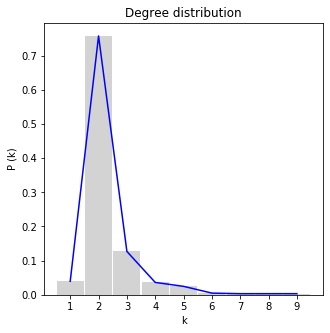

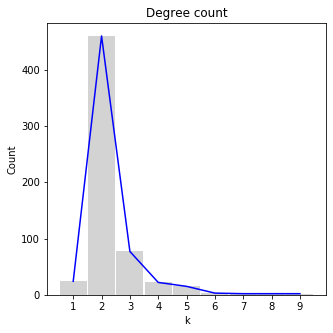

In [14]:
''' The degree distribution of the Belgian railway system'''

#Sort degree values
degree_sequence=sorted([d for n, d in B.degree()], reverse=True)

#Count number of frequences of degree values
degreeCount=collections.Counter(degree_sequence)

#Define variables deg and cnt and probability
deg, cnt = zip(*degreeCount.items())
probability = []
for v in cnt:
    pv= v/len(B.nodes())
    probability.append(pv)

#plot degree probability histogram
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, probability, width=0.95, color='lightgrey')

#plot degree distribution
plt.plot(deg, probability, color="b")

#graph settings
plt.title("Degree distribution")
plt.ylabel("P (k)")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#count
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, cnt, width=0.95, color='lightgrey')

plt.plot(deg, cnt, color="b")

#graph settings
plt.title("Degree count")
plt.ylabel("Count")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [15]:
''' Detection of the scale-free property in the Belgian railway system:
A PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '''
print("The scale-free property is present in the Belgian railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 5 or higher")

' Detection of the scale-free property in the Belgian railway system:\nA PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '

The scale-free property is present in the Belgian railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 5 or higher


In [16]:
''' The average path length of the Belgian railway system:
The average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs
which can be reached by means of one or multiple routes.'''
print(nx.average_shortest_path_length(B))

' The average path length of the Belgian railway system:\nThe average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs\nwhich can be reached by means of one or multiple routes.'

18.45525524545865


In [17]:
''' The assortativity of the Belgian railway system:
In an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. 
In a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'''
print(nx.degree_pearson_correlation_coefficient(B))

' The assortativity of the Belgian railway system:\nIn an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. \nIn a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'

0.21788508449992508


## **Calculation of the global characteristics of the Dutch railway system in the L-space representation**

In [18]:
''' To construct the network graph for the Netherlands '''
N = nx.Graph()
N = nx.from_pandas_edgelist(df_for_edges_Netherlands, 'stop_name_1', 'stop_name_2')

' To construct the network graph for the Netherlands '

In [19]:
''' To assign weights to the network graph for the Netherlands'''
# To assign node weights to graph
for i in range(len(stops_cleaned_Netherlands)):
    for n, d in N.nodes(data=True):
        if stops_cleaned_Netherlands.stop_name[i] == n:
            N.nodes[n]['latitude']=stops_cleaned_Netherlands.stop_lat[i];
            N.nodes[n]['longitude']=stops_cleaned_Netherlands.stop_lon[i];
            N.nodes[n]['country']=stops_cleaned_Netherlands.country[i];
            
N.nodes(data=True)

# To assign edge weights to the graph: the edge weight represents a list that contains all route_ids that cover that edge
routes_on_edge = {}
for node1,node2, nodeData in N.edges(data = True):
    if (node1, node2) not in routes_on_edge:
            routes_on_edge[(node1, node2)] = set()
    route_id_node1_node2= df_for_edges_Netherlands[(df_for_edges_Netherlands['stop_name_1'] == node1 ) & (df_for_edges_Netherlands['stop_name_2'] == node2 )]['route_id']
    route_id_node2_node1= df_for_edges_Netherlands[(df_for_edges_Netherlands['stop_name_1'] == node2 ) & (df_for_edges_Netherlands['stop_name_2'] == node1 )]['route_id']
    for route_id in pd.concat([route_id_node1_node2, route_id_node2_node1]):
        routes_on_edge[(node1, node2)].add(route_id)
    nodeData['route_id'] = routes_on_edge[(node1, node2)] 

N.edges(data=True)

' To assign weights to the network graph for the Netherlands'

NodeDataView({'AMSTERDAM CENTRAAL': {'latitude': 52.3789197836, 'longitude': 4.90088939667, 'country': 'Netherlands'}, 'SCHIPHOL AIRPORT': {'latitude': 52.309456010699996, 'longitude': 4.76228356361, 'country': 'Netherlands'}, 'ROTTERDAM CENTRAAL': {'latitude': 51.924383443800004, 'longitude': 4.4697457552, 'country': 'Netherlands'}, 'ROTTERDAM ALEXANDER': {'latitude': 51.9516764051, 'longitude': 4.55200374126, 'country': 'Netherlands'}, 'GOUDA': {'latitude': 52.0169549682, 'longitude': 4.705415368080001, 'country': 'Netherlands'}, 'UTRECHT CENTRAAL': {'latitude': 52.089451330600006, 'longitude': 5.10987102985, 'country': 'Netherlands'}, 'LEIDEN CENTRAAL': {'latitude': 52.1663529517, 'longitude': 4.48206782341, 'country': 'Netherlands'}, 'LEIDEN LAMMENSCHANS': {'latitude': 52.146538819499995, 'longitude': 4.49349403381, 'country': 'Netherlands'}, 'ALPHEN A/D RIJN': {'latitude': 52.124734897399996, 'longitude': 4.657559394840001, 'country': 'Netherlands'}, 'BODEGRAVEN': {'latitude': 52.

EdgeDataView([('AMSTERDAM CENTRAAL', 'SCHIPHOL AIRPORT', {'route_id': {59426, 17795, 67402, 66765, 17615, 17522, 77589, 75065, 77626, 77595, 77631}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM SLOTERDIJK', {'route_id': {17792, 61920, 76993, 41226, 17803, 46093, 77614, 41202, 17748, 46036, 52984, 52986, 17661, 52990, 41214}}), ('AMSTERDAM CENTRAAL', 'HILVERSUM', {'route_id': {76452, 77638, 67431, 77591, 77592, 77593, 77628, 17725}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM MUIDERPOORT', {'route_id': {61920, 46084, 77610, 46092, 17748}}), ('AMSTERDAM CENTRAAL', 'AMSTERDAM AMSTEL', {'route_id': {17792, 77614, 52984, 52986, 52990}}), ('AMSTERDAM CENTRAAL', 'UTRECHT CENTRAAL', {'route_id': {77600, 77633, 77601, 77603, 77634, 75064, 77602, 77604, 77632, 67402, 66765, 34264, 34238}}), ('AMSTERDAM CENTRAAL', 'ALMERE CENTRUM', {'route_id': {45189, 44942}}), ('AMSTERDAM CENTRAAL', 'HAARLEM', {'route_id': {74608}}), ('AMSTERDAM CENTRAAL', 'ROTTERDAM CENTRAAL', {'route_id': {75060}}), ('AMSTERDAM CENTRAAL', 'HI

In [20]:
''' The number of nodes in the Dutch railway system '''
# The number of total nodes in the Dutch railway system that consists of all routes that contain at least one node in the Netherlands
len(N.nodes())

# The number of belgian nodes in the Dutch railway system that consists of all routes that contain at least one node in the Netherlands
number_dutch_stations = 0
for n, d in N.nodes(data=True):
    if N.nodes[n]['country']=='Netherlands':
        number_dutch_stations += 1

number_dutch_stations

' The number of nodes in the Dutch railway system '

519

394

In [21]:
''' The degrees of the nodes in the Dutch railway system '''
N.degree()

' The degrees of the nodes in the Dutch railway system '

DegreeView({'AMSTERDAM CENTRAAL': 12, 'SCHIPHOL AIRPORT': 9, 'ROTTERDAM CENTRAAL': 16, 'ROTTERDAM ALEXANDER': 4, 'GOUDA': 11, 'UTRECHT CENTRAAL': 20, 'LEIDEN CENTRAAL': 11, 'LEIDEN LAMMENSCHANS': 2, 'ALPHEN A/D RIJN': 3, 'BODEGRAVEN': 2, 'WOERDEN': 5, 'ALMERE OOSTVAARDERS': 2, 'ALMERE BUITEN': 4, 'ALMERE PARKWIJK': 2, 'ALMERE CENTRUM': 7, 'ALMERE MUZIEKWIJK': 2, 'ALMERE POORT': 3, 'WEESP': 4, 'DIEMEN ZUID': 2, 'DUIVENDRECHT': 7, 'AMSTERDAM RAI': 2, 'AMSTERDAM ZUID': 5, 'HOOFDDORP': 3, 'AMERSFOORT SCHOTHORST': 2, 'AMERSFOORT CENTRAAL': 10, 'DEN HAAG CENTRAAL': 5, 'GRONINGEN': 5, 'ASSEN': 4, 'ZWOLLE': 11, 'BREDA': 7, 'LEEUWARDEN': 7, 'GROU-JIRNSUM': 2, 'AKKRUM': 2, 'HEERENVEEN': 4, 'WOLVEGA': 2, 'STEENWIJK': 3, 'MEPPEL': 3, 'BAARN': 3, 'SOESTDIJK': 2, 'SOEST': 2, 'SOEST ZUID': 2, 'DEN DOLDER': 3, 'BILTHOVEN': 2, 'UTRECHT OVERVECHT': 4, 'WEZEP': 2, "HARDE ('T)": 2, 'NUNSPEET': 2, 'HARDERWIJK': 3, 'ERMELO': 2, 'PUTTEN': 2, 'NIJKERK': 4, 'AMERSFOORT VATHORST': 2, 'UTRECHT LEIDSCHE RIJN': 2,

In [22]:
''' The average degree of the nodes in the Dutch railway system indicating the number of directions 
a commuter can take from that given station.'''
# The average degree of all the nodes in the Dutch railway system that consists of all routes that cover at least one dutch station
sum = 0
for n in N.nodes():
    sum = sum + N.degree[n]
print(sum/len(N.nodes()))

# The average degree of all the nodes in the Dutch railway system if only the dutch stations are considered
sum = 0
number_dutch_stations = 0
for n, d in N.nodes(data=True):
    if N.nodes[n]['country']=='Netherlands':
        number_dutch_stations += 1
        sum = sum + N.degree[n]
print(sum/number_dutch_stations)

' The average degree of the nodes in the Dutch railway system indicating the number of directions \na commuter can take from that given station.'

2.6820809248554913
2.83502538071066


In [23]:
''' The number of edges in the Dutch railway system '''
len(N.edges())

' The number of edges in the Dutch railway system '

696

In [24]:
''' The gamma index of the Dutch railway system'''
gamma_index = len(N.edges()) / (3*(len(N.nodes()) - 2))
gamma_index

' The gamma index of the Dutch railway system'

0.44874274661508706

In [25]:
''' The mean local clustering coefficient of the Dutch railway system '''
#The mean local clustering coefficient indicates for a random station the estimation of the division of the number of neighbouring stations of a station that are connected 
# divided by the possible number of connections between the neighbours of that station
print ("mean local clustering:", nx.average_clustering(N))

' The mean local clustering coefficient of the Dutch railway system '

mean local clustering: 0.1040167981174442


' The degree distribution of the Dutch railway system'

<BarContainer object of 14 artists>

Text(0.5, 1.0, 'Degree distribution')

Text(0, 0.5, 'P (k)')

Text(0.5, 0, 'k')

[Text(0, 0, '20'),
 Text(0, 0, '16'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

<BarContainer object of 14 artists>

Text(0.5, 1.0, 'Degree count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'k')

[Text(0, 0, '20'),
 Text(0, 0, '16'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

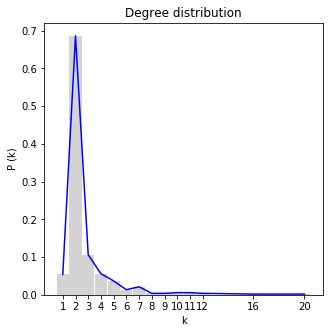

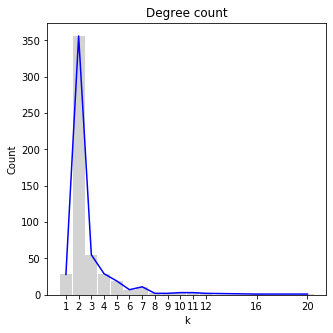

In [26]:
''' The degree distribution of the Dutch railway system'''

#Sort degree values
degree_sequence=sorted([d for n, d in N.degree()], reverse=True)

#Count number of frequences of degree values
degreeCount=collections.Counter(degree_sequence)

#Define variables deg and cnt and probability
deg, cnt = zip(*degreeCount.items())
probability = []
for v in cnt:
    pv= v/len(N.nodes())
    probability.append(pv)

#plot degree probability histogram
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, probability, width=0.95, color='lightgrey')

#plot degree distribution
plt.plot(deg, probability, color="b")

#graph settings
plt.title("Degree distribution")
plt.ylabel("P (k)")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#count
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, cnt, width=0.95, color='lightgrey')

plt.plot(deg, cnt, color="b")

#graph settings
plt.title("Degree count")
plt.ylabel("Count")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [27]:
''' Detection of the scale-free property in the Dutch railway system:
A PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '''
print("The scale-free property is present in the Dutch railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 6 or higher")

' Detection of the scale-free property in the Dutch railway system:\nA PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '

The scale-free property is present in the Dutch railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 6 or higher


In [28]:
''' The average path length of the Dutch railway system:
The average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs
which can be reached by means of one or multiple routes.'''
print(nx.average_shortest_path_length(N))

' The average path length of the Dutch railway system:\nThe average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs\nwhich can be reached by means of one or multiple routes.'

9.865065726337402


In [29]:
''' The assortativity of the Dutch railway system:
In an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. 
In a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'''
print(nx.degree_pearson_correlation_coefficient(N))

' The assortativity of the Dutch railway system:\nIn an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. \nIn a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'

0.27022522681178707


## **Calculation of the global characteristics of the Swiss railway system in the L-space representation**

In [30]:
''' To construct the network graph for Switzerland '''
S = nx.Graph()
S = nx.from_pandas_edgelist(df_for_edges_Switzerland, 'stop_name_1', 'stop_name_2')

' To construct the network graph for Switzerland '

In [31]:
''' To assign weights to the network graph for Switzerland'''
# To assign node weights to graph
for i in range(len(stops_cleaned_Switzerland)):
    for n, d in S.nodes(data=True):
        if stops_cleaned_Switzerland.stop_name[i] == n:
            S.nodes[n]['latitude']=stops_cleaned_Switzerland.stop_lat[i];
            S.nodes[n]['longitude']=stops_cleaned_Switzerland.stop_lon[i];
            S.nodes[n]['country']=stops_cleaned_Switzerland.country[i];
            
S.nodes(data=True)

# To assign edge weights to the graph: the edge weight represents a list that contains all route_ids that cover that edge
routes_on_edge = {}
for node1,node2, nodeData in S.edges(data = True):
    if (node1, node2) not in routes_on_edge:
            routes_on_edge[(node1, node2)] = set()
    route_id_node1_node2= df_for_edges_Switzerland[(df_for_edges_Switzerland['stop_name_1'] == node1 ) & (df_for_edges_Switzerland['stop_name_2'] == node2 )]['route_id']
    route_id_node2_node1= df_for_edges_Switzerland[(df_for_edges_Switzerland['stop_name_1'] == node2 ) & (df_for_edges_Switzerland['stop_name_2'] == node1 )]['route_id']
    for route_id in pd.concat([route_id_node1_node2, route_id_node2_node1]):
        routes_on_edge[(node1, node2)].add(route_id)
    nodeData['route_id'] = routes_on_edge[(node1, node2)] 

S.edges(data=True)

' To assign weights to the network graph for Switzerland'

NodeDataView({'LES BRENETS': {'latitude': 47.06721, 'longitude': 6.707389, 'country': 'Switzerland'}, 'LES FRETES': {'latitude': 47.05858, 'longitude': 6.725787, 'country': 'Switzerland'}, 'LE LOCLE LE CHALET': {'latitude': 47.055918, 'longitude': 6.738986, 'country': 'Switzerland'}, 'LE LOCLE': {'latitude': 47.057861, 'longitude': 6.746153, 'country': 'Switzerland'}, 'BRIENZ BRB': {'latitude': 46.755214, 'longitude': 8.038089, 'country': 'Switzerland'}, 'PLANALP': {'latitude': 46.772373, 'longitude': 8.019844, 'country': 'Switzerland'}, 'BRIENZER ROTHORN': {'latitude': 46.787399, 'longitude': 8.038446, 'country': 'Switzerland'}, 'BASEL BAD BF': {'latitude': 47.567308, 'longitude': 7.60692, 'country': 'Switzerland'}, 'BASEL SBB': {'latitude': 47.547412, 'longitude': 7.589562, 'country': 'Switzerland'}, 'HAUENSTEIN-BASISTUNNEL': {'latitude': 47.401134000000006, 'longitude': 7.904317999999999, 'country': 'Switzerland'}, 'ZURICH HB': {'latitude': 47.378177, 'longitude': 8.540212, 'country

EdgeDataView([('LES BRENETS', 'LES FRETES', {'route_id': {'00023.000044.012:23', '00035.000044.010:35', '00015.000044.013:15', '00033.000044.009:33', '00016.000044.016:16', '00041.000044.010:41', '00031.000044.010:31', '00014.000044.014:14', '00046.000044.005:46', '00036.000044.010:36', '00030.000044.013:30', '00050.000044.008:50', '00005.000044.018:5', '00042.000044.006:42', '00037.000044.011:37', '00037.000044.009:37', '00003.000044.017:3', '00027.000044.017:27', '00028.000044.017:28', '00041.000044.007:41', '00048.000044.013:48', '00048.000044.012:48', '00043.000044.005:43', '00044.000044.010:44', '00007.000044.021:7', '00003.000044.022:3', '00034.000044.013:34', '00040.000044.007:40', '00043.000044.009:43', '00027.000044.011:27', '00047.000044.012:47', '00012.000044.016:12', '00048.000044.006:48', '00004.000044.017:4', '00013.000044.019:13', '00006.000044.022:6', '00019.000044.010:19', '00029.000044.012:29', '00023.000044.020:23', '00040.000044.012:40', '00029.000044.013:29', '0003

In [32]:
''' The number of nodes in the Swiss railway system '''
# The number of total nodes in the Swiss railway system that consists of all routes that contain at least one node in the Netherlands
len(S.nodes())

# The number of belgian nodes in the Swiss railway system that consists of all routes that contain at least one node in the Netherlands
number_swiss_stations = 0
for n, d in S.nodes(data=True):
    if S.nodes[n]['country']=='Switzerland':
        number_swiss_stations += 1

number_swiss_stations

' The number of nodes in the Swiss railway system '

1963

1762

In [33]:
''' The degrees of the nodes in the Swiss railway system '''
S.degree()

' The degrees of the nodes in the Swiss railway system '

DegreeView({'LES BRENETS': 1, 'LES FRETES': 2, 'LE LOCLE LE CHALET': 2, 'LE LOCLE': 4, 'BRIENZ BRB': 1, 'PLANALP': 2, 'BRIENZER ROTHORN': 1, 'BASEL BAD BF': 8, 'BASEL SBB': 15, 'HAUENSTEIN-BASISTUNNEL': 2, 'ZURICH HB': 25, 'ZIMMERBERG-BASISTUNNEL': 3, 'SARGANS': 9, 'LANDQUART': 11, 'CHUR': 15, 'TASCH': 2, 'ZERMATT': 2, 'STE-CROIX': 1, 'SIX-FONTAINES': 2, 'BAULMES': 2, 'VUITEBOEUF': 2, 'ESSERT-SOUS-CHAMPVENT': 2, 'VALEYRES-SOUS-MONTAGNY': 2, 'LA BRINAZ': 3, 'YVERDON-LES-BAINS': 10, 'YVERDON WILLIAM BARBEY': 2, 'ALPNACHSTAD PB': 1, 'AEMSIGEN': 2, 'PILATUS KULM': 1, 'BLONAY': 5, 'CHAMBY': 5, 'CHAMBY-MUSEE': 2, 'INTERLAKEN OST': 6, 'INTERLAKEN WEST': 2, 'SPIEZ': 8, 'THUN': 8, 'BERN': 26, 'BAHN-2000-STRECKE': 5, 'OLTEN': 27, 'LIESTAL': 8, 'AIGLE': 8, 'AIGLE-HOPITAL': 2, 'ST-TRIPHON-VILLAGE': 2, 'OLLON VD': 2, 'LES ARNOUX': 2, 'VILLY': 2, 'ST-TRIPHON-GARE': 2, 'PONT DU RHONE': 2, 'CORBIER': 2, 'COLLOMBEY-MURAZ': 2, 'MONTHEY-EN PLACE': 3, 'MONTHEY-VILLE': 1, 'MONTHEY-HOPITAL': 2, 'CHEMEX': 2,

In [34]:
''' The average degree of the nodes in the Swiss railway system indicating the number of directions 
a commuter can take from that given station.'''
# The average degree of all the nodes in the Swiss railway system that consists of all routes that cover at least one Swiss station
sum = 0
for n in S.nodes():
    sum = sum + S.degree[n]
print(sum/len(S.nodes()))

# The average degree of all the nodes in the Swiss railway system if only the Swiss stations are considered
sum = 0
number_swiss_stations = 0
for n, d in S.nodes(data=True):
    if S.nodes[n]['country']=='Switzerland':
        number_swiss_stations += 1
        sum = sum + S.degree[n]
print(sum/number_swiss_stations)

' The average degree of the nodes in the Swiss railway system indicating the number of directions \na commuter can take from that given station.'

2.7223637289862457
2.7372304199772985


In [35]:
''' The number of edges in the Swiss railway system '''
len(S.edges())

' The number of edges in the Swiss railway system '

2672

In [36]:
''' The gamma index of the Swiss railway system'''
gamma_index = len(S.edges()) / (3*(len(S.nodes()) - 2))
gamma_index

' The gamma index of the Swiss railway system'

0.4541900390956995

In [37]:
''' The mean local clustering coefficient of the Swiss railway system '''
#The mean local clustering coefficient indicates for a random station the estimation of the division of the number of neighbouring stations of a station that are connected 
# divided by the possible number of connections between the neighbours of that station
print ("mean local clustering:", nx.average_clustering(S))

' The mean local clustering coefficient of the Swiss railway system '

mean local clustering: 0.16556618812394783


' The degree distribution of the Swiss railway system'

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Degree distribution')

Text(0, 0.5, 'P (k)')

Text(0.5, 0, 'k')

[Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '18'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Degree count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'k')

[Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '18'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

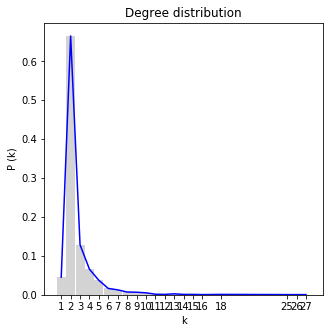

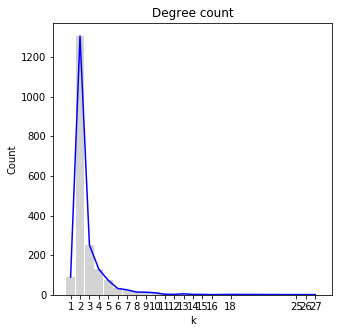

In [38]:
''' The degree distribution of the Swiss railway system'''

#Sort degree values
degree_sequence=sorted([d for n, d in S.degree()], reverse=True)

#Count number of frequences of degree values
degreeCount=collections.Counter(degree_sequence)

#Define variables deg and cnt and probability
deg, cnt = zip(*degreeCount.items())
probability = []
for v in cnt:
    pv= v/len(S.nodes())
    probability.append(pv)

#plot degree probability histogram
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, probability, width=0.95, color='lightgrey')

#plot degree distribution
plt.plot(deg, probability, color="b")

#graph settings
plt.title("Degree distribution")
plt.ylabel("P (k)")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#count
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(deg, cnt, width=0.95, color='lightgrey')

plt.plot(deg, cnt, color="b")

#graph settings
plt.title("Degree count")
plt.ylabel("Count")
plt.xlabel("k")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [39]:
''' Detection of the scale-free property in the Swiss railway system:
A PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '''
print("The scale-free property is present in the Swiss railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 5 or higher")

' Detection of the scale-free property in the Swiss railway system:\nA PTN with the scale-free property consists of a large number of vertices that exhibit low degree and a few number of vertices that exhibit very high degree. '

The scale-free property is present in the Swiss railway network because the majority of nodes exhibit a low degree value equal to 2 and almost none of the nodes exhibit a degree value equal to 5 or higher


In [40]:
''' The average path length of the Swiss railway system:
The average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs
which can be reached by means of one or multiple routes.'''
print(nx.average_shortest_path_length(S))

' The average path length of the Swiss railway system:\nThe average path length represents in the L-space the average of all the shortest paths to be transversed between all public transport stop pairs\nwhich can be reached by means of one or multiple routes.'

NetworkXError: Graph is not connected.

In [44]:
''' The assortativity of the Swiss railway system:
In an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. 
In a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'''
print(nx.degree_pearson_correlation_coefficient(S))

' The assortativity of the Swiss railway system:\nIn an assortative network, high-degree vertices tend to be connected and low-degree vertices tend to stick together as well. \nIn a disassortative network conversely, high-degree and low-degree vertices tend to be connected to each other instead of being connected to vertices of the same kind.'

0.23744472114361093


# To export the railway graphs

In [43]:
nx.write_gpickle(B, "graphs/B_graph")
nx.write_gpickle(N, "graphs/N_graph")
nx.write_gpickle(S, "graphs/S_graph")